<a href="https://colab.research.google.com/github/70409876/AWESOME_ml_projects/blob/main/project_house_price_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import sklearn.model_selection
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
from sklearn.model_selection import train_test_split # Changed 'train_test_spilt' to 'train_test_split'

x = data.drop(['median_house_value'],axis = 1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
train_data =x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,INLAND,72000.0
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,<1H OCEAN,274100.0
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,INLAND,58300.0
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,<1H OCEAN,200000.0
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,INLAND,117900.0
...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,INLAND,93800.0
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,NEAR BAY,103100.0
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND,192600.0
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,<1H OCEAN,153500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

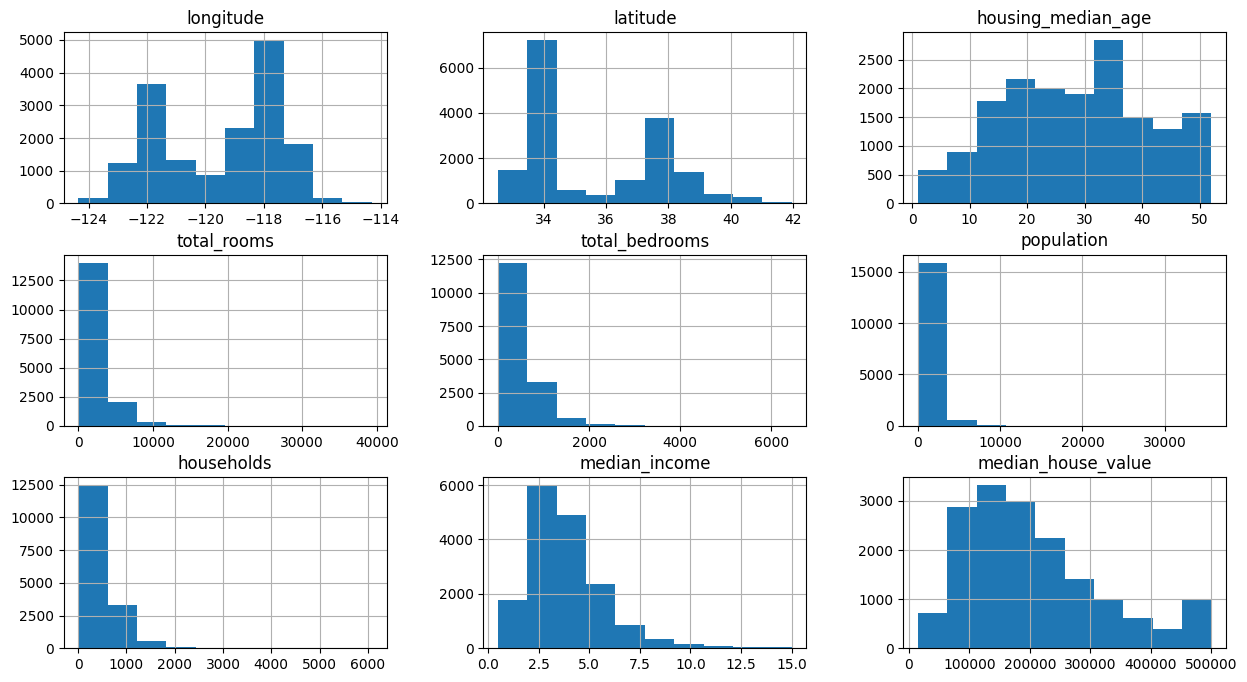

In [ ]:
train_data.hist(figsize = (15,8))

<Axes: >

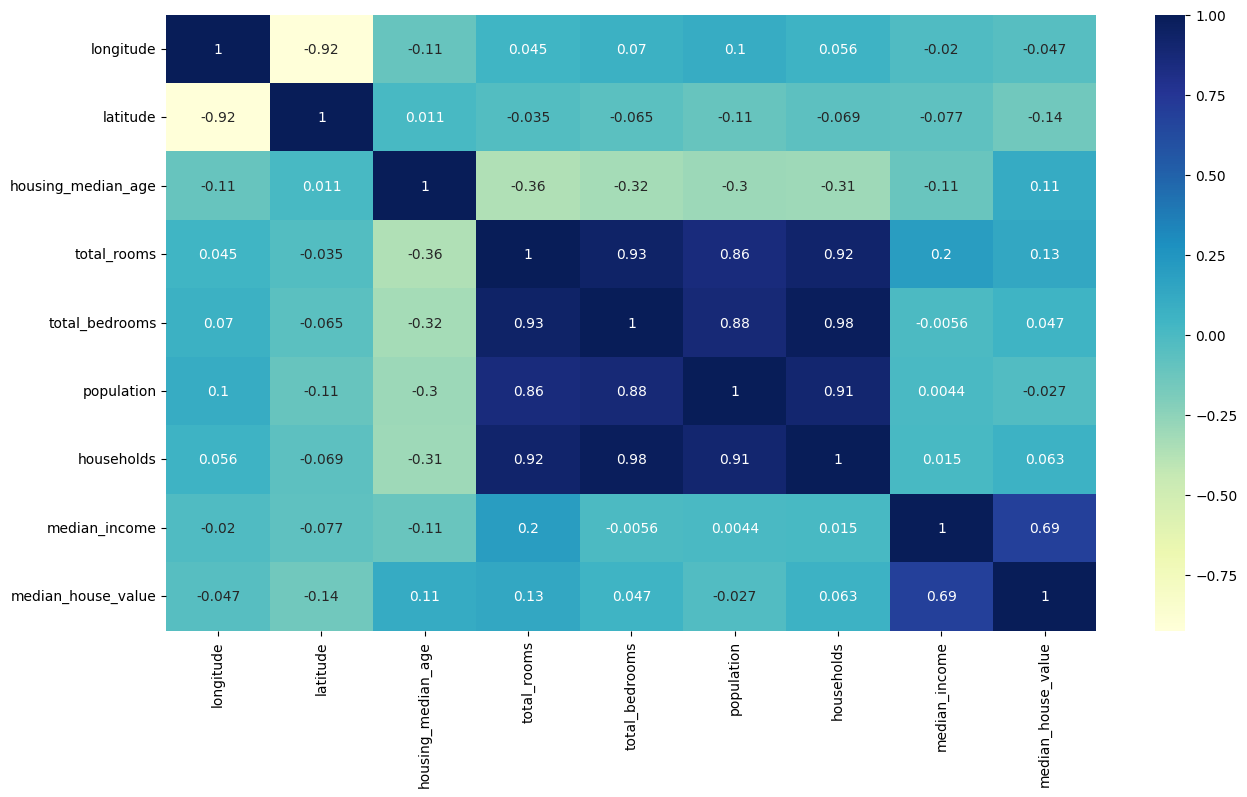

In [ ]:
plt.figure(figsize = (15,8))
# Only include numerical features for correlation calculation
numerical_features = train_data.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='YlGnBu')

In [ ]:

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['tal_bedrooms'] = np.log(train_data['total_rooms']+1)
train_data['total_population'] = np.log(train_data['total_rooms']+1)
train_data['total_households'] = np.log(train_data['total_rooms']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_population'}>,
        <Axes: title={'center': 'total_households'}>, <Axes: >]],
      dtype=object)

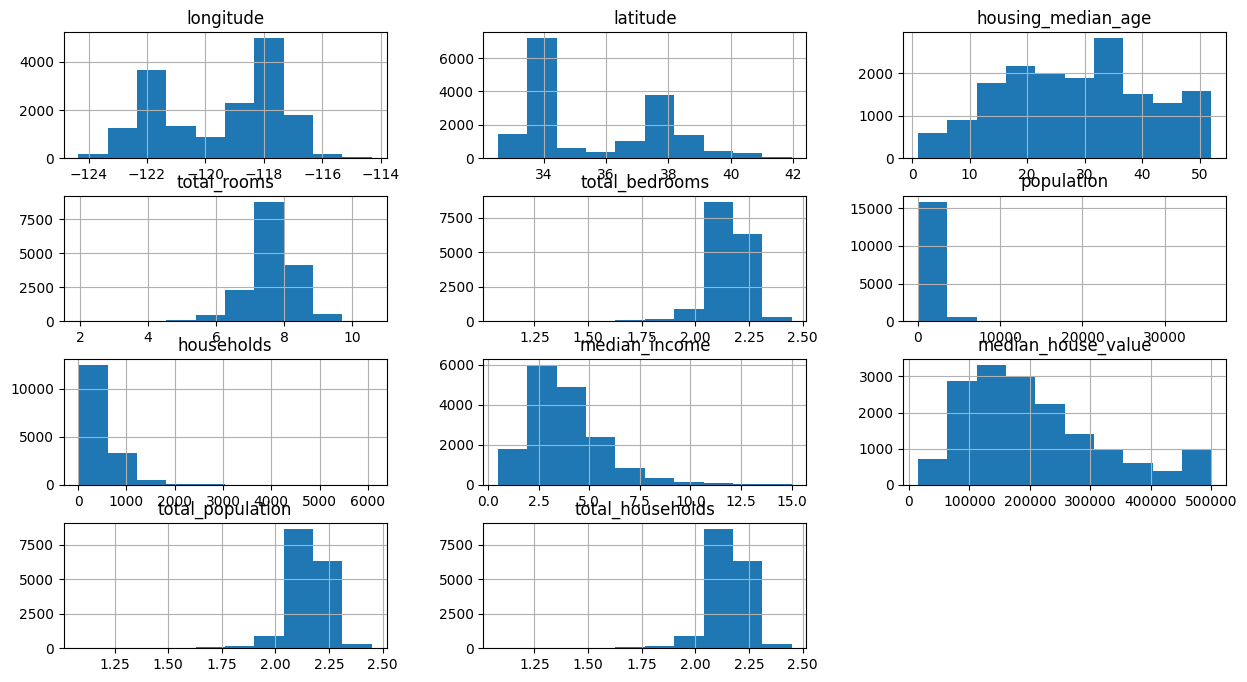

In [ ]:
train_data.hist(figsize = (15,8)) # Changed 'ist' to 'hist'

In [ ]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7312
INLAND,5235
NEAR OCEAN,2140
NEAR BAY,1821
ISLAND,4


<Axes: >

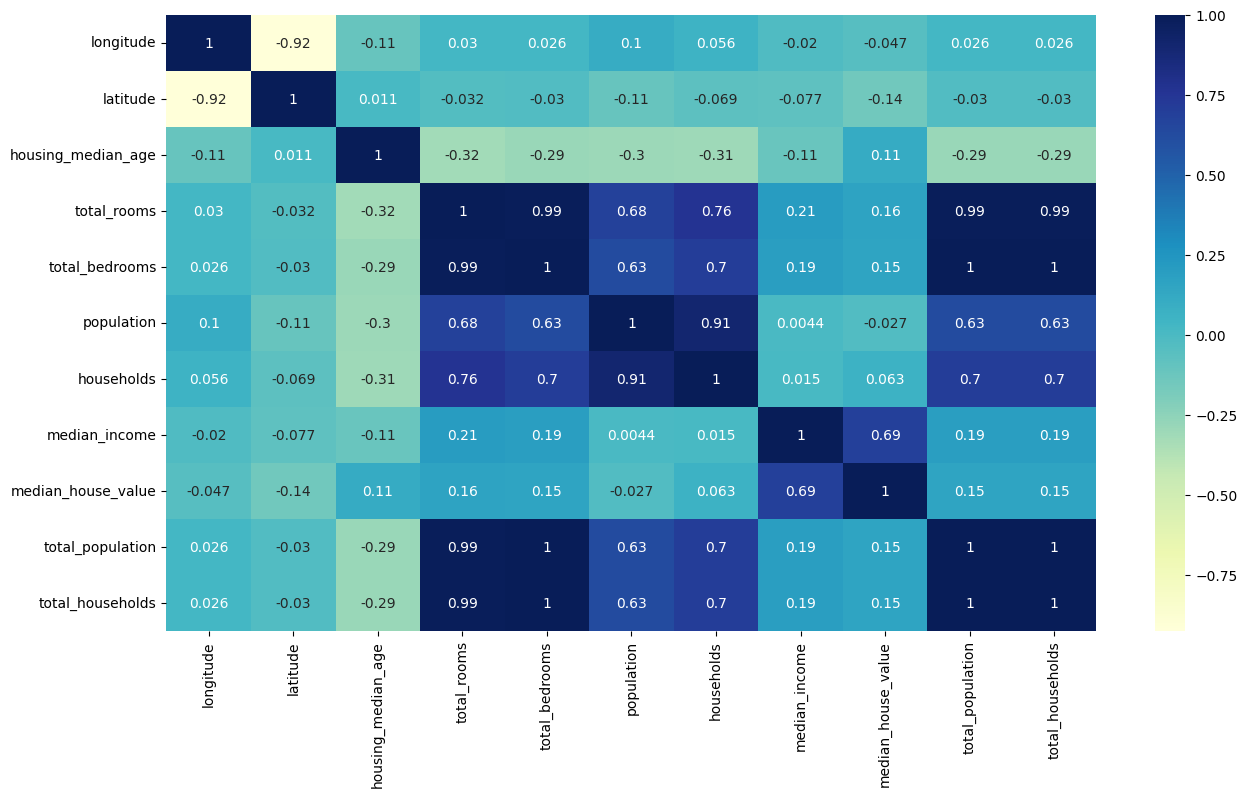

In [ ]:
plt.figure(figsize = (15,8))
# Only include numerical features for correlation calculation
numerical_features = train_data.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

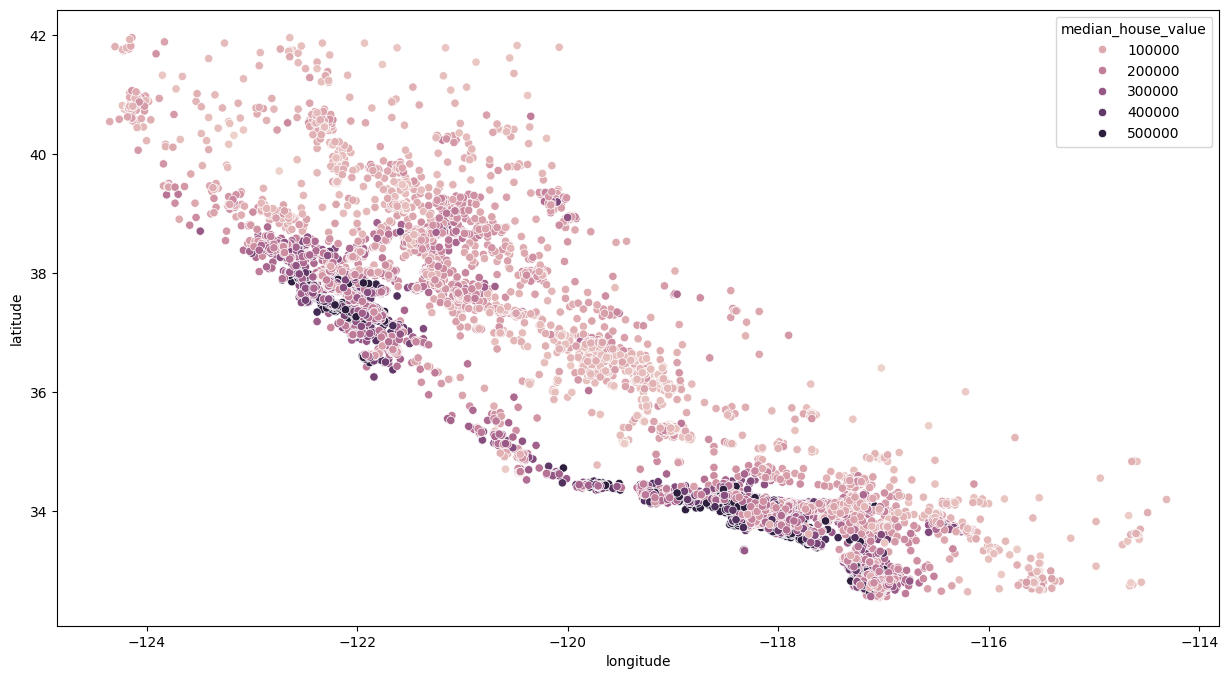

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = train_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['total_households']

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'],axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic dataset for a linear regression problem
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Convert X and y into Pandas DataFrames for clarity
X = pd.DataFrame(X, columns=['Feature_1', 'Feature_2', 'Feature_3'])
y = pd.Series(y, name='Target')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine x_test and y_test into a single DataFrame
test_data = pd.concat([x_test, y_test], axis=1)

# Instead of applying transformations to non-existent columns,
# you can add new columns or modify existing ones based on your needs.
# For example, if you want to apply a log transformation to 'Feature_1':
test_data['Feature_1_log'] = np.log(test_data['Feature_1'] + 1)

# You can similarly create or modify other columns as needed.
# Remember that the original dataset from make_regression does not
# contain columns like 'total_rooms', 'total_bedrooms', etc.

# Print the updated test_data DataFrame
print(test_data.head())

    Feature_1  Feature_2  Feature_3     Target  Feature_1_log
83   0.343618   0.324084  -1.763040   2.925372       0.295366
53   0.199060   0.069802  -0.600217   0.229337       0.181538
70  -0.715304  -0.730367   0.679598 -62.863487      -1.256332
45   0.865755  -0.334501  -1.200296 -22.017093       0.623666
44  -0.719844   1.057122  -0.460639  50.812196      -1.272409


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_train,y_train)

0.9880163460668654

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}

grid_search = GridSearchCV(forest,param_grid,cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10)

In [ ]:
best_forest = grid_search.best_estimator_


In [ ]:
best_forest.score(x_train,y_train)

0.9824863609971765